# Exoplanet Hunting in Deep Space

Training Kepler labelled time series data by using neural networks.

The data describe the change in flux (light intensity) of several thousand stars over a time period of roughly 80 days. Each star has a binary label of 2 or 1. 2 indicates that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems. Planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.

### Description 
Trainset:
* 5087 rows or observations.
* 3198 columns or features.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

Testset:
* 570 rows or observations.
* 3198 columns or features.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 5 confirmed exoplanet-stars and 565 non-exoplanet-star

### Acknowledgements
The data presented here are cleaned and are derived from observations made by the NASA Kepler space telescope. The datasets were prepared late-summer 2016. The Mission is ongoing and over 99% of this dataset originates from Campaign 3. To boost the number of exoplanet-stars in the dataset, confirmed exoplanets from other campaigns were also included. Campaign 3 was used because this Campaign is unlikely to contain any undiscovered (i.e. wrongly labelled) exoplanets. 

NASA open-sources the original Kepler Mission data and it is hosted at the Mikulski Archive. 

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn as sk
import scipy

%matplotlib inline

In [ ]:
# Connect Google Collab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading training and test data (GOOGLE DRIVE)
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exoTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exoTest.csv')

In [ ]:
# Reading training and test data (LOCAL)
'''
train_data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')
'''

"\ntrain_data = pd.read_csv('exoTrain.csv')\ntest_data = pd.read_csv('exoTest.csv')\n"

## Data Overview

In [ ]:
# Data overview.
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


The data is sorted according to the label of the stars.

In [ ]:
# View some basic statistical details like percentile, mean, std etc. of the training data
perc =[.20, .40, .60, .80] 
include =['object', 'float', 'int'] 
train_data.describe(percentiles = perc, include = include) 

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.00000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,1.410852e+02,1.124563e+02,1.050821e+02,7.720985e+01,60.143330,17.630999,-54.355089,-103.08460,-144.560114,-113.322037,-68.828616,-32.839733,31.196475,88.517940,175.080436,233.700224,281.801687,4.643881e+02,5.347781e+02,5.686202e+02,5.575065e+02,5.667802e+02,5.469081e+02,1.775987e+02,1.977492e+02,2.291148e+02,2.441020e+02,2.501690e+02,2.613476e+02,2.326228e+02,...,8.001983e+02,8.456118e+02,7.564445e+02,116.982994,158.543973,129.188885,5.817181,-97.778421,-84.500629,-2.522744,125.509414,354.448954,6.254212e+02,8.012768e+02,106.772064,80.353945,12.455127,-94.172579,-181.646112,-320.240619,-358.358437,-323.468262,-281.609027,-213.522064,-107.086774,-110.572898,-71.794968,-31.777614,72.747847,126.815573,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,1.942289e+04,1.832810e+04,1.768321e+04,1.731920e+04,16647.817648,16725.088231,17162.322247,17356.98839,16979.436723,16011.508248,15118.835589,14255.363528,14048.475841,14618.614614,15246.020915,16803.416700,17930.530299,2.523553e+04,2.704750e+04,2.964609e+04,3.315534e+04,3.679672e+04,4.144422e+04,2.071160e+04,2.108089e+04,2.144121e+04,2.175216e+04,2.180420e+04,2.164199e+04,2.132321e+04,...,5.116648e+04,5.829319e+04,5.898207e+04,16075.902775,16263.350901,15613.273881,14397.292446,14887.907167,14466.376116,12079.533421,12455.557157,20116.003038,3.307799e+04,4.613980e+04,15648.242604,15514.533197,14142.137616,13113.457203,13161.476260,14165.866392,15083.632082,14587.243316,13548.583112,11544.505620,10369.103689,10653.997273,10238.433598,10849.383610,16548.155180,20119.224581,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,-2.223300e+05,-2.279016e+05,-2.996757e+05,-4.453612e+05,-557042.690000,-695994.840000,-815633.560000,-880865.85000,-892477.410000,-85

## Data Quality Assessment
Checking for missing, inconsistent or duplicate data, if any.

In [ ]:
# Missing data
n_missing_values = train_data.isnull().sum().sum()
print('There are', n_missing_values, 'missing values in the train data!\n')

n_missing_values_2 = test_data.isnull().sum().sum()
print('There are', n_missing_values_2, 'missing values in the test data!\n')

# Inconsistent data (letters instead of integers etc.)
print('Train data info: \n')
train_data.info()
print('\n')

print('Test data info: \n')
test_data.info()
print('\n')

# Duplicate data
print('Duplicate rows in train data: ')
n_duplicate_rows = train_data[train_data.duplicated()]
print(n_duplicate_rows)
print('\n')

print('Duplicate rows in test data: ')
n_duplicate_rows_2 = test_data[test_data.duplicated()]
print(n_duplicate_rows_2)

There are 0 missing values in the train data!

There are 0 missing values in the test data!

Train data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


Test data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


Duplicate rows in train data: 
Empty DataFrame
Columns: [LABEL, FLUX.1, FLUX.2, FLUX.3, FLUX.4, FLUX.5, FLUX.6, FLUX.7, FLUX.8, FLUX.9, FLUX.10, FLUX.11, FLUX.12, FLUX.13, FLUX.14, FLUX.15, FLUX.16, FLUX.17, FLUX.18, FLUX.19, FLUX.20, FLUX.21, FLUX.22, FLUX.23, FLUX.24, FLUX.25, FLUX.26, FLUX.27, FLUX.28, FLUX.29, FLUX.30, FLUX.31, FLUX.32, FLUX.33, FLUX.34, FLUX.35, FLUX.36, FLUX.37, FLUX.38, FLUX.39, FLUX.40, FLUX.41, FLUX.42, FLUX.43, FLUX.44, FLUX.45, FLUX.46, FLUX.47, FLUX.48, FLUX.49, FLUX.50, FLUX.51, FLUX.52, FLUX

## Simple Data Visualization
20 charts plotted. First half for the stars with exoplanet(s) and the other half for the stars without exoplanet(s). The graphics are useful for seeing and understanding what the features that distinguish these two classes might be. Since we are dealing with a time series classification task, we are looking for some patterns in the data. Especially patterns occurring in regular intervals.

In [ ]:
# Separating positive and negative examples
positive_ex = train_data[train_data['LABEL'] == 2]
negative_ex = train_data[train_data['LABEL'] == 1]

# Randomly selecting 10 samples for each class
random.seed(2077)
positive_sample = random.sample(range(len(positive_ex.index)), 10)
negative_sample = random.sample(range(len(negative_ex.index)), 10)

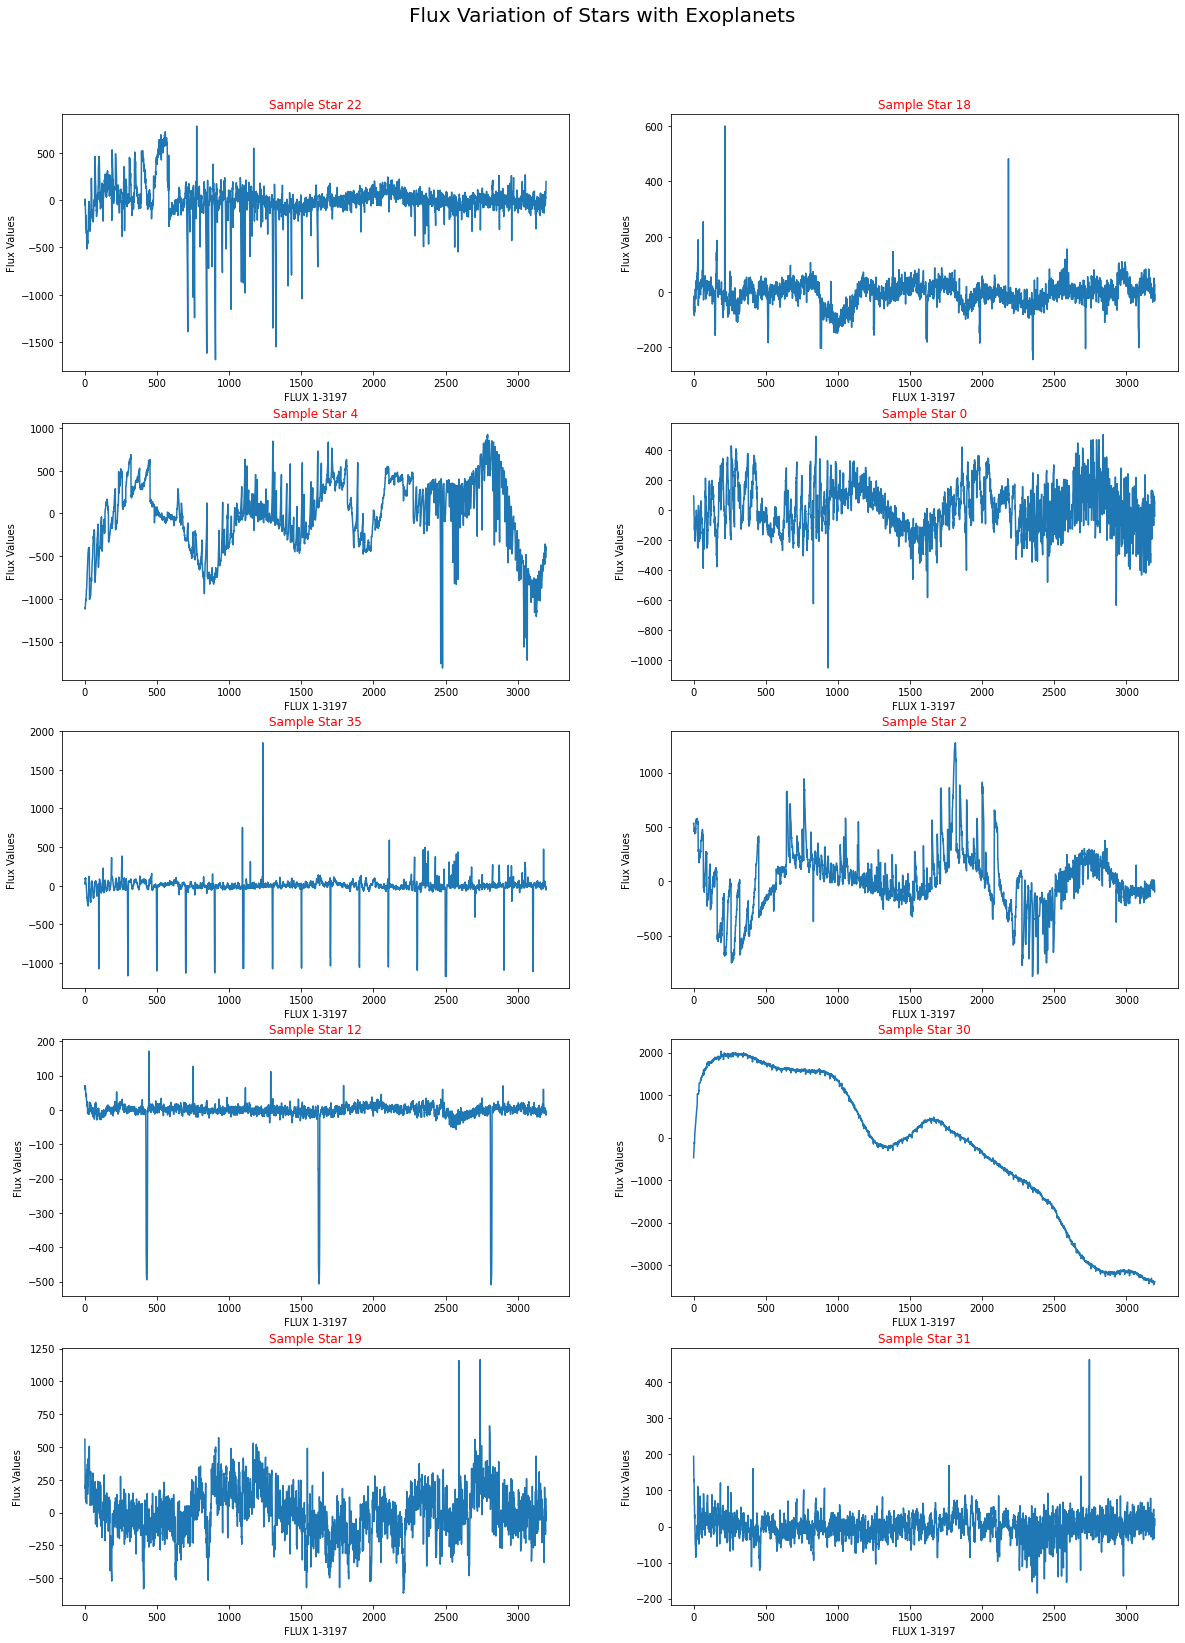

In [ ]:
# Plotting flux variation of 10 positive sample
fig = plt.figure(figsize = (20,15))
x_axis = len(train_data.columns) - 1
for i in range(10):
    ax = fig.add_subplot(5,2,i+1)
    ax.plot(range(x_axis), positive_ex.iloc[positive_sample[i],1:])
    plt.subplots_adjust(bottom=-0.5)
    plt.title('Sample Star %i' %(positive_sample[i]), color='red')
    plt.ylabel('Flux Values')
    plt.xlabel('FLUX 1-3197')
fig.suptitle('Flux Variation of Stars with Exoplanets', fontsize=20)
plt.show()

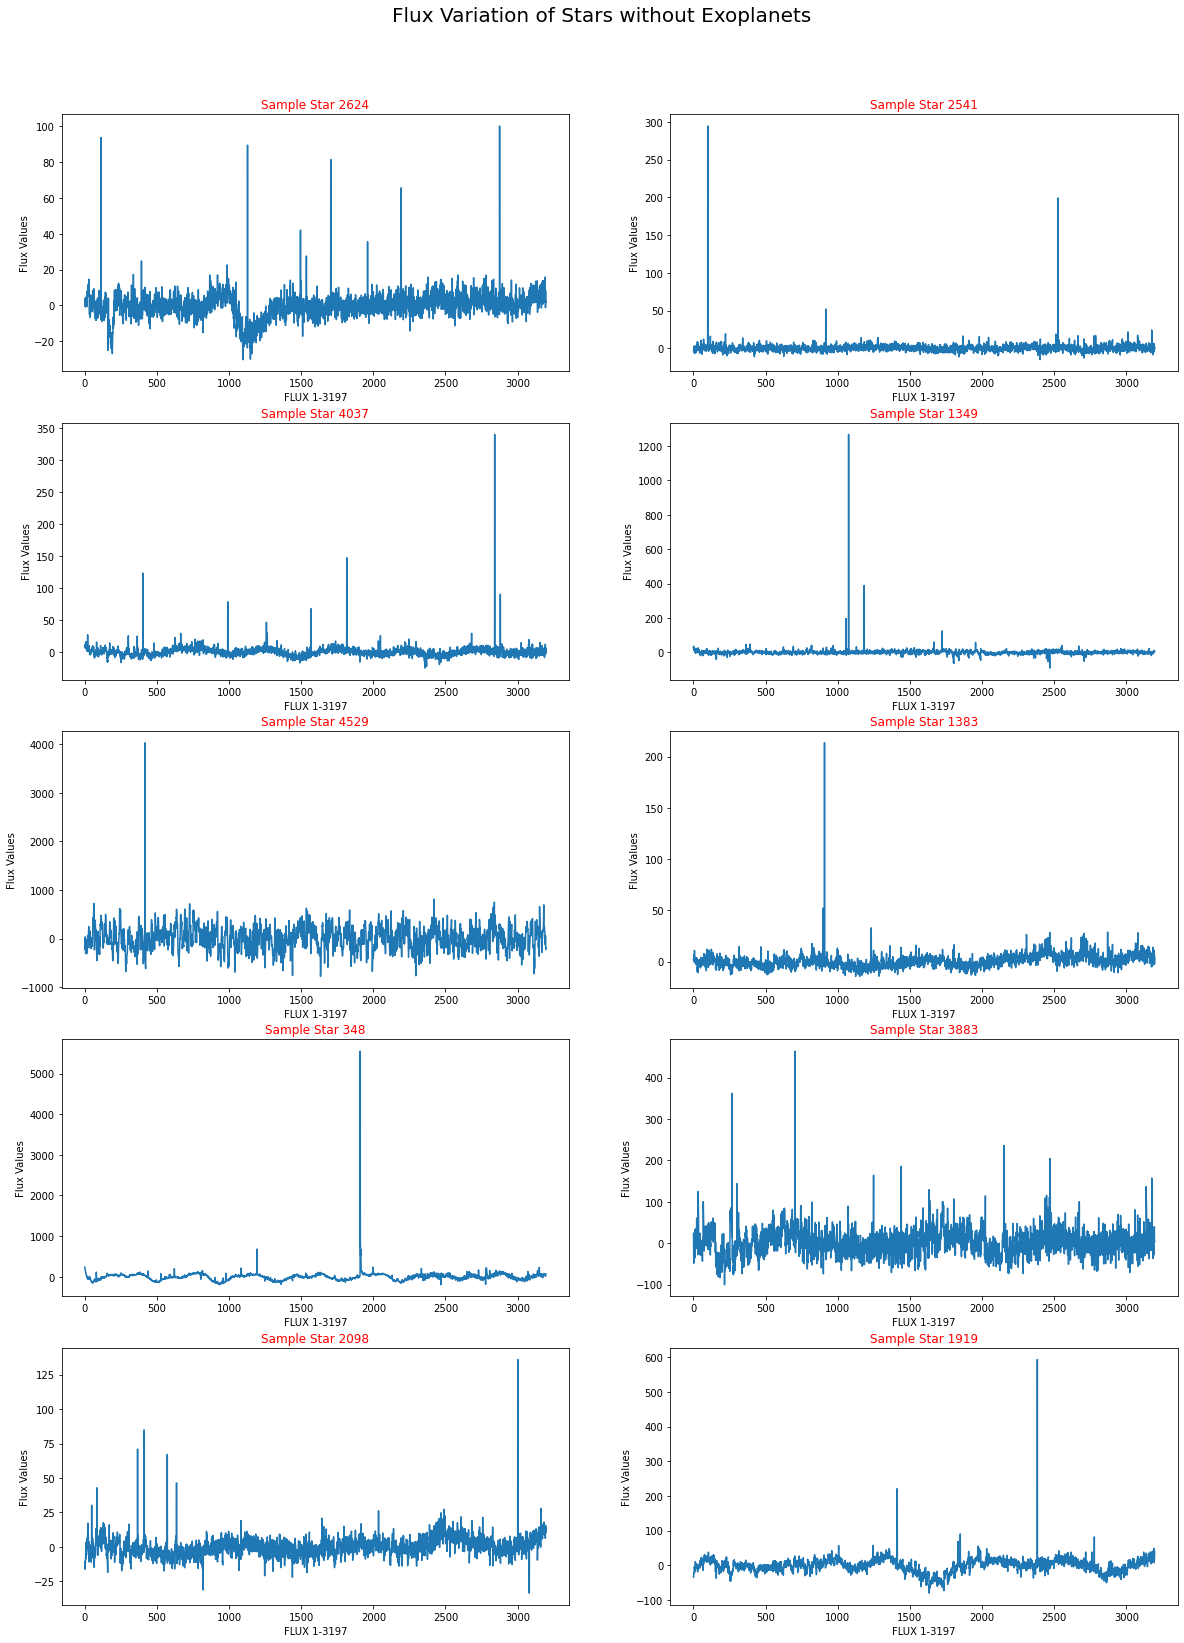

In [ ]:
# Plotting flux variation of 10 negative sample
fig = plt.figure(figsize = (20,15))
x_axis = len(train_data.columns) - 1
for i in range(10):
    ax = fig.add_subplot(5,2,i+1)
    ax.plot(range(x_axis), negative_ex.iloc[negative_sample[i],1:])
    plt.subplots_adjust(bottom=-0.5)
    plt.title('Sample Star %i' %(negative_sample[i]), color='red')
    plt.ylabel('Flux Values')
    plt.xlabel('FLUX 1-3197')
fig.suptitle('Flux Variation of Stars without Exoplanets', fontsize=20)
plt.show()

#### Inference
   Looking at the graphs for positive examples, a sudden dimming in flux can be seen clearly, means that there could be an orbiting exoplanet around the star. Especially, for 'Sample Star 5' and for 'Sample Star 7' this dimming in flux is ocurring in regular intervals which greatly enhances the possibility of having an exoplanet. But remember that, this data represents only 80 days of observation of flux variation. Not having a flux dimming at regular intervals for 80 days does not mean star does not have an exoplanet. The star can have a planet with an orbit period of more than 80 days (such as Earth-Sun). Even, for some stars we don't see any distinct flux dimming. For example, 'Sample Star 8' and 'Sample Star 10' do not show us any distinct flux dimming, however, they are confirmed to have exoplanets. 
   
   Looking at the graphs for negative examples, it is easy to see that there is no huge dimming in flux which is I think the main feature that distinguishes the two classes.
   
   There are huge sudden increases in flux for nearly all the graphs. This could be because of outliers or instrument noise.

## Dealing with High Value Outliers
There are sudden peaks in the graphs plotted above. Since we are looking for the 'dimmings' in the flux, I think it's better to get rid of this sudden peaks (noise) in order to provide a better learning process.

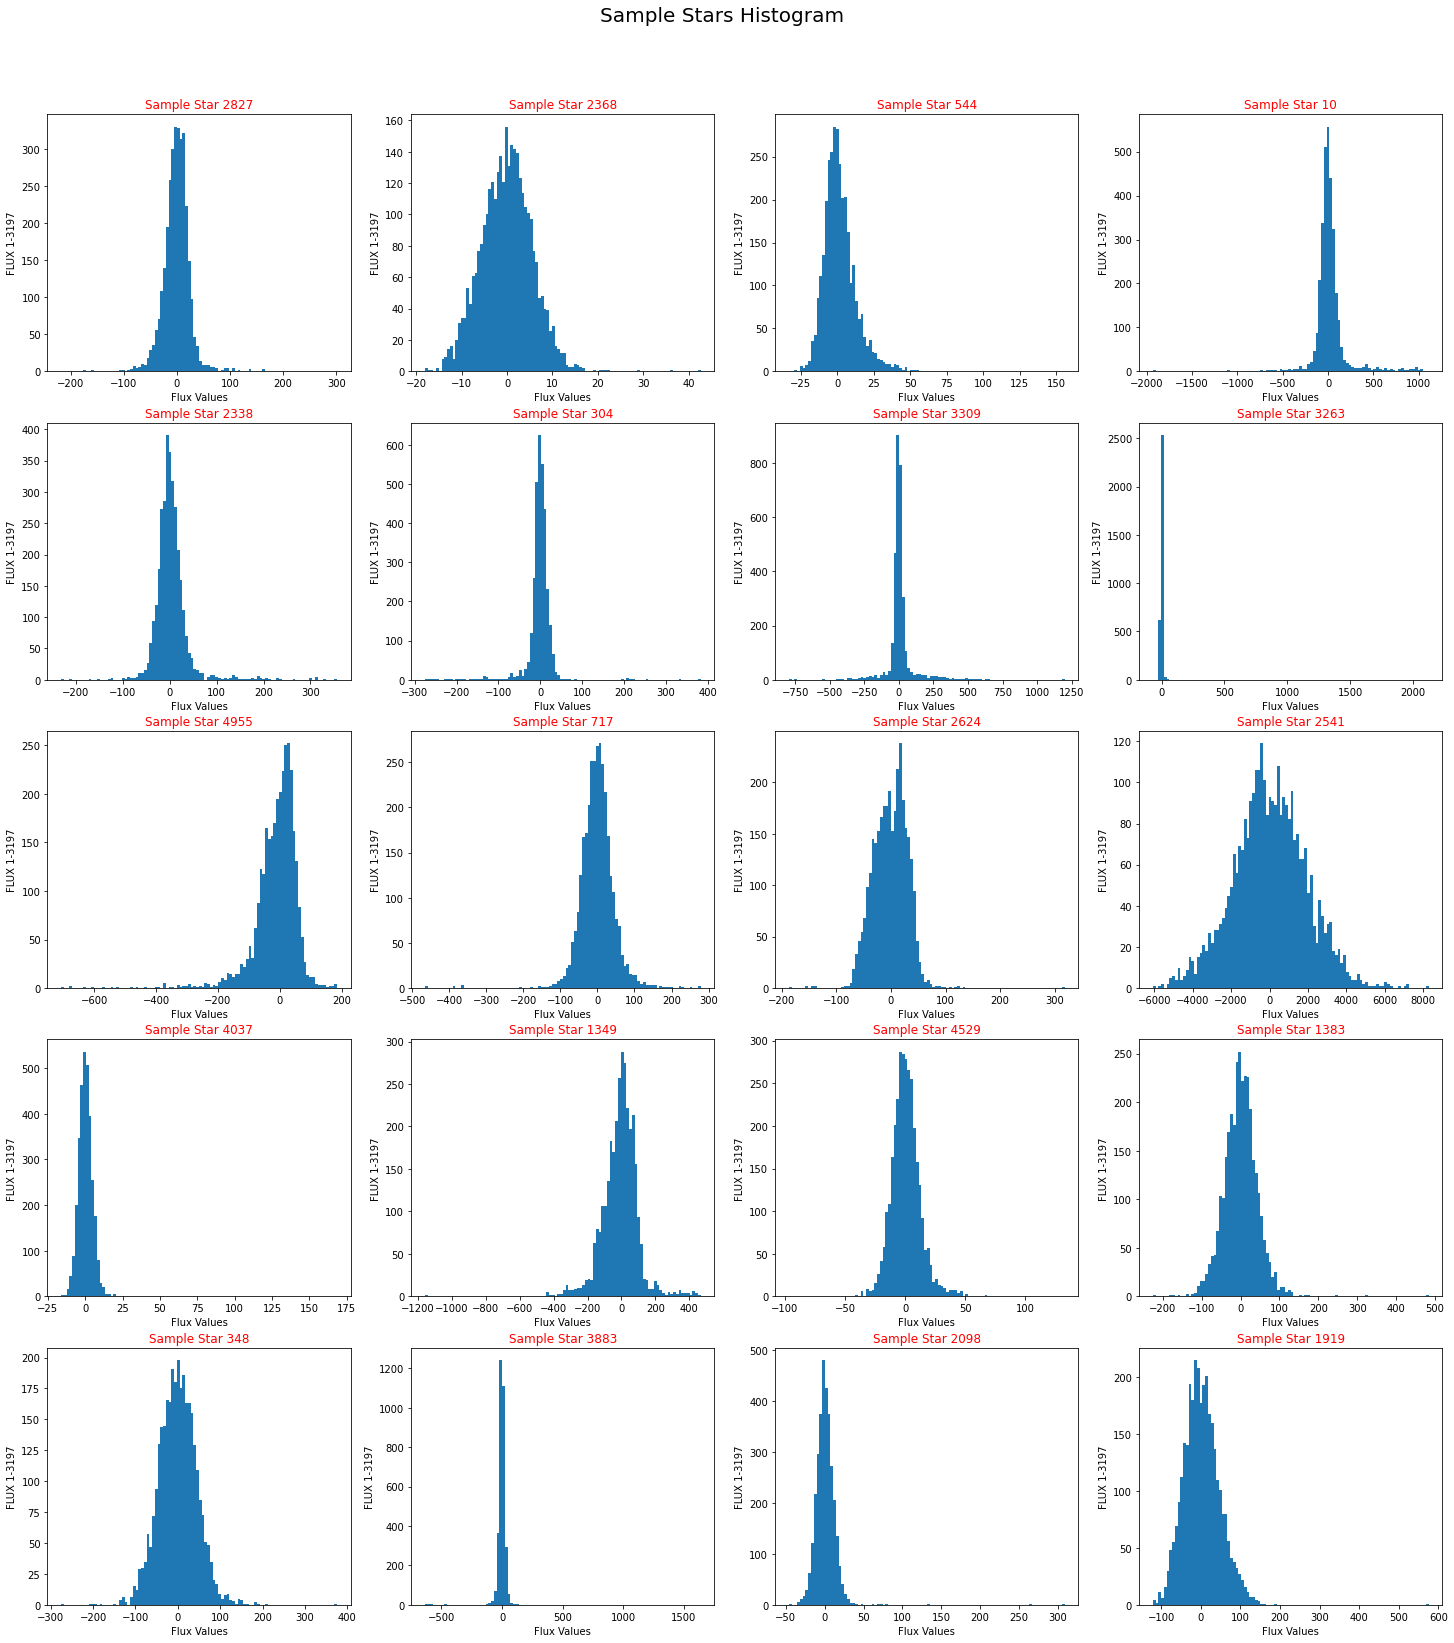

In [ ]:
# Plotting histograms for 20 random star
random.seed(2077)
sample_stars = random.sample(range(len(train_data.index)), 20)

fig = plt.figure(figsize = (25,15))
x_axis = len(train_data.columns) - 1
for i in range(20):
    ax = fig.add_subplot(5,4,i+1)
    ax.hist(train_data.iloc[sample_stars[i],1:], bins=100)
    plt.subplots_adjust(bottom=-0.5)
    plt.title('Sample Star %i' %(sample_stars[i]), color='red')
    plt.xlabel('Flux Values')
    plt.ylabel('FLUX 1-3197')
fig.suptitle('Sample Stars Histogram', fontsize=20)
plt.show()

It's not surprising that we see a distribution similar to gaussian. In order to remove high value outliers, we will use 'emprical rule'. The empirical rule predicts that 68% of observations falls within the first standard deviation (µ ± σ), 95% within the first two standard deviations (µ ± 2σ), and 99.7% within the first three standard deviations (µ ± 3σ).

We will take 95% of the observations and replace high value outliers with the previous observation. This method is called as 'last observation carried forward (LOCF) method'. Note that low value outliers are what we are looking for, so we will keep them. 

In [ ]:
# Seperating data and labels
train_label = train_data.LABEL
test_label = test_data.LABEL

train_data = train_data.drop(['LABEL'], axis=1)
test_data = test_data.drop(['LABEL'], axis=1)

# Computing mean and standard deviation
mean = train_data.mean(axis=1)
std = train_data.std(axis=1)

In [ ]:
# Applying 'emprical rule' 
emprical_rule = abs(2*std + mean)

n_columns = len(train_data.iloc[0,:])
n_rows_train = len(train_data.iloc[:,0])
n_rows_test = len(test_data.iloc[:,0])

for i in range(n_rows_train):
    for j in range(n_columns):
        if train_data.iloc[i, j] > emprical_rule[i]:
          train_data.iloc[i, j] = train_data.iloc[i, j-1] # LOCF (Last Observation Carried Forward)

for i in range(n_rows_test):
    for j in range(n_columns):
        if test_data.iloc[i, j] > emprical_rule[i]:
          test_data.iloc[i, j] = test_data.iloc[i, j-1] # LOCF (Last Observation Carried Forward)       

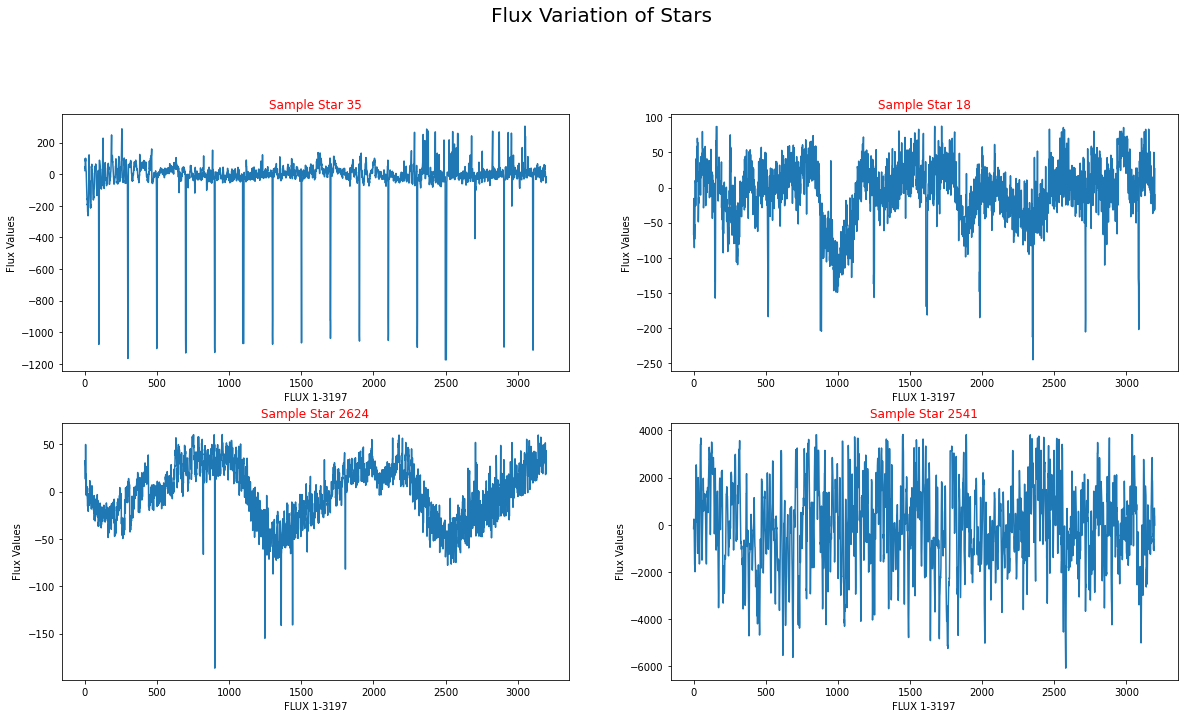

In [ ]:
# Checking results
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(5,2,1)
ax.plot(range(n_columns), train_data.iloc[35,0:])
plt.subplots_adjust(bottom=-0.5)
plt.title('Sample Star %i' %35, color='red')
plt.ylabel('Flux Values')
plt.xlabel('FLUX 1-3197')

ax = fig.add_subplot(5,2,2)
ax.plot(range(n_columns), train_data.iloc[18,0:])
plt.subplots_adjust(bottom=-0.5)
plt.title('Sample Star %i' %18, color='red')
plt.ylabel('Flux Values')
plt.xlabel('FLUX 1-3197')

ax = fig.add_subplot(5,2,3)
ax.plot(range(n_columns), train_data.iloc[2624,0:])
plt.subplots_adjust(bottom=-0.5)
plt.title('Sample Star %i' %2624, color='red')
plt.ylabel('Flux Values')
plt.xlabel('FLUX 1-3197')

ax = fig.add_subplot(5,2,4)
ax.plot(range(n_columns), train_data.iloc[2541,0:])
plt.subplots_adjust(bottom=-0.5)
plt.title('Sample Star %i' %2541, color='red')
plt.ylabel('Flux Values')
plt.xlabel('FLUX 1-3197')


fig.suptitle('Flux Variation of Stars', fontsize=20)
plt.show()

## Preprocessing

In [ ]:
# Original data: train_data, train_label, test_data, test_label

# Creating copies:
X_train = train_data.copy()
X_test = test_data.copy()
y_train = train_label.copy()
y_test = test_label.copy()

In [ ]:
# Applying Fourier Transform:
X_train = np.abs(np.fft.fft(X_train, axis=1))
X_test = np.abs(np.fft.fft(X_test, axis=1))

# Applying 1-D uniform filter:
from  scipy import ndimage

X_train = ndimage.filters.uniform_filter1d(X_train, axis=1, size=75)
X_test = ndimage.filters.uniform_filter1d(X_test, axis=1, size=75)

# Applying l2 normalization:
from sklearn.preprocessing import normalize 
X_train = normalize(X_train)
X_test = normalize(X_test)

# Appyling standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# DataFrame to numpy array labels:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# OneHotEncoding labels:
y_train = y_train[:] - 1
y_test = y_test[:] - 1

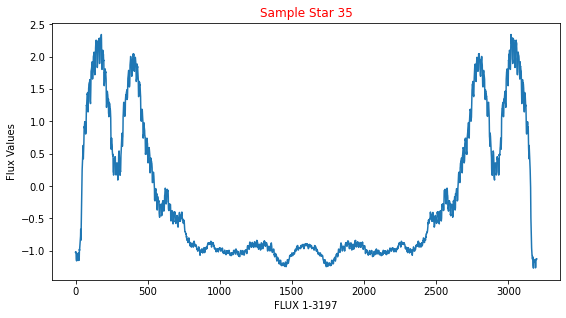

In [ ]:
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(5,2,1)
ax.plot(range(n_columns), X_train[35,0:])
plt.subplots_adjust(bottom=-0.5)
plt.title('Sample Star %i' %35, color='red')
plt.ylabel('Flux Values')
plt.xlabel('FLUX 1-3197')
plt.show()

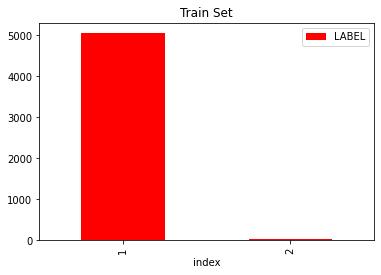

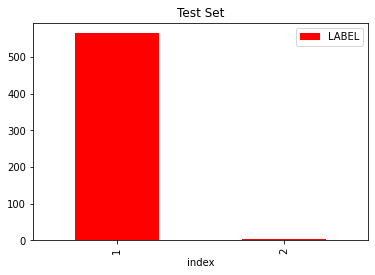

Train set positive rate:  0.007273442107332416 
Test set positive rate:  0.008771929824561403 
Total positive rate:  0.0074244299098462085


In [ ]:
# Calculatin positive sample rate & visualizing

train_label.value_counts().reset_index().plot(title='Train Set',
                                              kind='bar', x='index', 
                                              y='LABEL', color='red')
plt.show()

test_label.value_counts().reset_index().plot(title='Test Set',
                                              kind='bar', x='index', 
                                              y='LABEL', color='red')
plt.show()

train_pos_rate = sum(train_label[:] == 2) / len(train_label)
test_pos_rate = sum(test_label[:] == 2) / len(test_label)
total_pos_rate = (sum(train_label[:] == 2) + sum(test_label[:] == 2)) / (len(train_label) + len(test_label))
print('Train set positive rate: ', train_pos_rate,
      '\nTest set positive rate: ', test_pos_rate,
      '\nTotal positive rate: ', total_pos_rate)

## Model Selection & Training
It is natural to consider using the RNNs for a time series data. However, our task is not forecasting even though we have a time series data. Our task is basically a binary classification task. After a short literature review, three different popular deep learning based approaches are found for time series classification (TSC) tasks.

These are respectively:
* Multilayer Perceptron (MLP)
* Fully Convolutional Networks (FCN)
* The residual networks (ResNet)

And all of them are end-to-end architectures.

As can be easily seen, our data is hugely imbalanced. This will surely lead us to overfitting. To solve this problem we will create new samples for minority class and undersample the majority class. Also we will use batch normalization, dropout and global average pooling in our models.

In [ ]:
# Import Keras
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers  
from keras.optimizers import Adam, Adadelta
from keras.callbacks import EarlyStopping
from sklearn.metrics import *

### Multilayer Perceptron (MLP)


In [ ]:
# Creating more positive example by time reversing the existing examples
def flip_positives(X, y):
    positives = X[y == 1]
    X_flip = np.fliplr(positives)
    X_new = np.vstack([X_flip, X])
    y_new = np.hstack([np.ones(len(X_flip)), y])
    return X_new, y_new

X_new, y_new = flip_positives(X_train, y_train)

positive_ex = X_new[y_new==1]
negative_ex = X_new[y_new==0]

# Add time-reversed positive examples & OneHotEncoding
X_new = np.vstack([positive_ex, negative_ex])
y_new = np.hstack([np.ones(len(positive_ex)), np.zeros(len(negative_ex))])

In [ ]:
# Building the MLP Model
model = models.Sequential(name='MLP')

model.add(layers.Input(X_new.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 3197)              12788     
_________________________________________________________________
dropout (Dropout)            (None, 3197)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1599000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000    

In [ ]:
# Building the MLP Model 2
model = models.Sequential(name='MLP2')

model.add(layers.Input(X_new.shape[1:]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "MLP2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 3197)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1599000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0      

In [ ]:
# Compiling the MLP Model
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [ ]:
# Using adaptive learning rate
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=200, min_lr=0.1)

In [ ]:
# Split training data as trainin set and validation set
from sklearn.model_selection import train_test_split

X_t, X_cv, y_t, y_cv = train_test_split(X_new[:1250,:], y_new[:1250], 
                                        test_size=0.2, random_state=42, 
                                        stratify=y_new[:1250])

# Undersample the overrepresented class by using only 1250 samples. Since samples
# already sorted, we will take all the positive examples.

In [ ]:
# Feed data to model
hist = model.fit(X_t, y_t, epochs=500, batch_size=128, shuffle=True,
                 validation_data=(X_cv, y_cv), 
                 callbacks=[reduce_lr])


Epoch 1/500
8/8 [==============================] - 3s 68ms/step - loss: 0.9504 - accuracy: 0.5615 - val_loss: 0.2466 - val_accuracy: 0.9480
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7595 - accuracy: 0.6064 - val_loss: 0.7085 - val_accuracy: 0.6760
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6257 - accuracy: 0.7112 - val_loss: 0.3817 - val_accuracy: 0.9200
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 0.5423 - accuracy: 0.7553 - val_loss: 0.6121 - val_accuracy: 0.7840
Epoch 5/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4545 - accuracy: 0.8268 - val_loss: 0.3585 - val_accuracy: 0.8680
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4120 - accuracy: 0.8403 - val_loss: 0.2445 - val_accuracy: 0.9240
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.3296 - accuracy: 0.9055 - val_loss: 0.2974 - val_accuracy: 0.9480
Epoch 8/500
8/8 [===

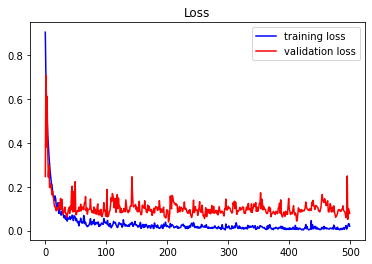

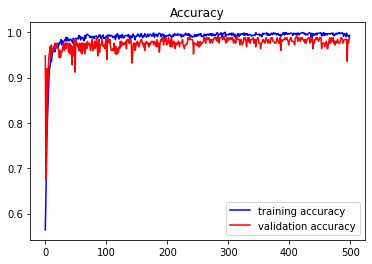

In [ ]:
# Plotting loss and accuracy

plt.plot(hist.history['loss'], color='b', label='training loss')
plt.plot(hist.history['val_loss'], color='r', label='validation loss')
plt.title('Loss')
plt.legend()
plt.show()
plt.plot(hist.history['accuracy'], color='b', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Feeding test data to model
y_pred = model.predict_classes(X_test)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[555  10]
 [  1   4]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


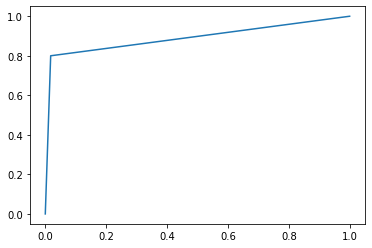

ROC area under curve is 0.89


In [ ]:
# Plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()
print("ROC area under curve is {0:.2f}".format(roc_auc_score(y_test, y_pred)))

### Fully Convolutional Network (FCN)

In [ ]:
# Oversampling underrepresented class (positive examples)
X_FCN_train = X_train.copy()
X_FCN_test = X_test.copy()
y_FCN_train = y_train.copy()
y_FCN_test = y_test.copy()

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

overSampler = RandomOverSampler(sampling_strategy='minority')
X_FCN_train, y_FCN_train = overSampler.fit_sample(X_FCN_train, y_FCN_train)

print ("Distribution of labels after resampling {}".format(Counter(y_FCN_train)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Distribution of labels after resampling Counter({1: 5050, 0: 5050})


In [ ]:
# Preparing training and test data shape for FCN
X_FCN_train = X_FCN_train.reshape(X_FCN_train.shape + (1,))
X_FCN_test = X_FCN_test.reshape(X_FCN_test.shape + (1,))

In [ ]:
# Building the FCN Model

model = models.Sequential(name='FCN')

model.add(layers.Input(X_FCN_train.shape[1:]))


model.add(layers.Conv1D(128, 8, 1, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))


model.add(layers.Conv1D(256, 5, 1, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))


model.add(layers.Conv1D(128, 3, 1, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "FCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 3197, 128)         1152      
_________________________________________________________________
batch_normalization_3 (Batch (None, 3197, 128)         512       
_________________________________________________________________
activation_3 (Activation)    (None, 3197, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3197, 256)         164096    
_________________________________________________________________
batch_normalization_4 (Batch (None, 3197, 256)         1024      
_________________________________________________________________
activation_4 (Activation)    (None, 3197, 256)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3197, 128)         98432   

In [ ]:
# Building the FCN Model 2

model = models.Sequential(name='FCN2')

model.add(layers.Input(X_FCN_train.shape[1:]))

model.add(layers.Dropout(0.2))

model.add(layers.Conv1D(128, 8, 1, padding='same'))
model.add(layers.MaxPool1D(strides=4))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Conv1D(256, 5, 1, padding='same'))
model.add(layers.MaxPool1D(strides=4))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Conv1D(128, 3, 1, padding='same'))
model.add(layers.MaxPool1D(strides=4))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling1D())

model.add(layers.Dropout(0.3))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
# Compiling the FCN model

model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [ ]:
# Using adaptive learning rate
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=200, min_lr=0.1)

In [ ]:
# Split training data as trainin set and validation set
from sklearn.model_selection import train_test_split

X_t, X_cv, y_t, y_cv = train_test_split(X_FCN_train, y_FCN_train, 
                                        test_size=0.2, random_state=42, 
                                        stratify=y_FCN_train)

In [ ]:
# Feed data to model
hist = model.fit(X_t, y_t, epochs=200, batch_size=128, shuffle=True,
                 validation_data=(X_cv, y_cv), 
                 callbacks=[reduce_lr])

Epoch 1/200
64/64 [==============================] - 27s 399ms/step - loss: 0.6077 - accuracy: 0.6596 - val_loss: 0.6382 - val_accuracy: 0.6856
Epoch 2/200
64/64 [==============================] - 24s 373ms/step - loss: 0.5911 - accuracy: 0.6735 - val_loss: 0.6480 - val_accuracy: 0.6792
Epoch 3/200
64/64 [==============================] - 24s 368ms/step - loss: 0.5692 - accuracy: 0.7014 - val_loss: 0.6686 - val_accuracy: 0.5460
Epoch 4/200
64/64 [==============================] - 24s 374ms/step - loss: 0.5760 - accuracy: 0.6884 - val_loss: 0.6326 - val_accuracy: 0.6089
Epoch 5/200
64/64 [==============================] - 24s 378ms/step - loss: 0.5677 - accuracy: 0.7003 - val_loss: 0.6811 - val_accuracy: 0.5629
Epoch 6/200
64/64 [==============================] - 24s 374ms/step - loss: 0.5489 - accuracy: 0.7199 - val_loss: 0.7684 - val_accuracy: 0.5569
Epoch 7/200
64/64 [==============================] - 24s 372ms/step - loss: 0.5447 - accuracy: 0.7103 - val_loss: 0.8567 - val_accuracy:

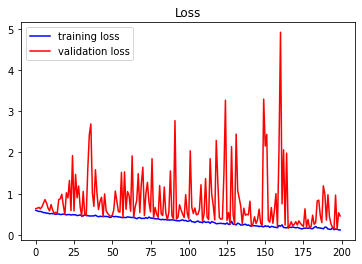

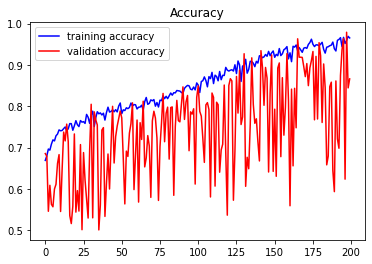

In [ ]:
# Plotting loss and accuracy:

plt.plot(hist.history['loss'], color='b', label='training loss')
plt.plot(hist.history['val_loss'], color='r', label='validation loss')
plt.title('Loss')
plt.legend()
plt.show()
plt.plot(hist.history['accuracy'], color='b', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Feeding test data to model
y_prob = model.predict_classes(X_FCN_test)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[552  13]
 [  2   3]]


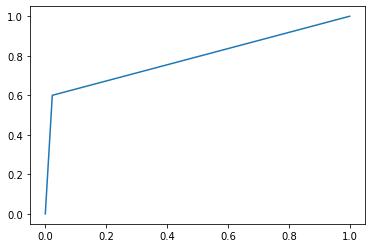

ROC area under curve is 0.79


In [ ]:
# Plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()
print("ROC area under curve is {0:.2f}".format(roc_auc_score(y_test, y_pred)))